In [1]:
%matplotlib inline
from root_numpy import tree2array, root2array, rec2array
import ROOT


from sklearn.model_selection import train_test_split
import matplotlib as mpl
import matplotlib.pyplot as plt

import pandas as pd
import pandas.core.common as com
from pandas.core.index import Index

from pandas.tools import plotting

Welcome to JupyROOT 6.12/04


In [2]:
#convert skimmed MC trees to numpy arrays
MCdir = '/var/pcfst/r01/lhcb/delaney/Analysis/LHCbAnalysis/Bc2Dmunu/sub_jobs_MC_SB/'
BkgMC='MCBu2DMuNu.root'
SigMC='MCBc2DMuNu.root'

bkgFile = ROOT.TFile(MCdir+BkgMC)
sigFile = ROOT.TFile(MCdir+SigMC)

bkgTree = bkgFile.Get('AnalysisTree')
sigTree = sigFile.Get('AnalysisTree')

In [3]:
#eventually load one tree and include itype selection
evtmax=-1

#should rename with string manipulation
#'B_plus_MCORRERR/B_plus_MCORR' bdt output correlated with MCORR
branches=['TMath::Log(B_plus_PT)','B_plus_PT', 
'TMath::Log(B_plus_IPCHI2_OWNPV)', 'TMath::ACos(B_plus_DIRA_OWNPV)', 'B_plus_LTIME', 'TMath::Log(D0_PT)',
 'D0_PT', 'TMath::Log(D0_IPCHI2_OWNPV)',
'TMath::Log(Mu_plus_PT)', 'TMath::Log(Mu_plus_MIPCHI2PV)'] 

sigArray = tree2array(sigTree, branches, start=0, stop=evtmax) 
sig=rec2array(sigArray)

bkgArray = tree2array(bkgTree, branches, start=0, stop=evtmax) 
bkg=rec2array(bkgArray)

In [4]:
#scikit learn requires 2D array (n_samples, n_features)
import numpy as np

X = np.concatenate((sig, bkg))
y = np.concatenate((np.ones(sig.shape[0]),
                    np.zeros(bkg.shape[0])))

#stack branches and the y-values; y values tag S/B
df = pd.DataFrame(np.hstack((X,y.reshape(y.shape[0], -1))),
                  columns=branches+['y'])

#BcMC = df[(df['y']==1)]
#BuMC = df[(df['y']==0)]


#df[(df['y']==0)]['B_plus_LTIME'].hist()
#bkg_lt = (df[(df['y']==0)]['B_plus_LTIME'])
#print bkg_lt.iloc[:10]
#print '--'
#print bkg_lt[:10]
#print bkg_lt.argsort()[:1000]
#print bkg_lt.iloc[bkg_lt.argsort()[:500]]
#print df[(df['y']==1)]['B_plus_LTIME'][:10]
#bkg_lt.hist(range=(0, 30))


/cvmfs/sft.cern.ch/lcg/views/LCG_92/x86_64-slc6-gcc62-opt/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


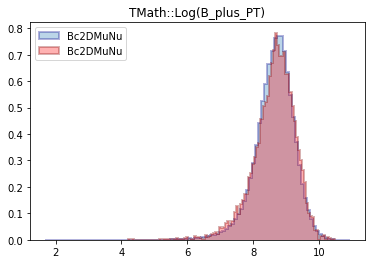

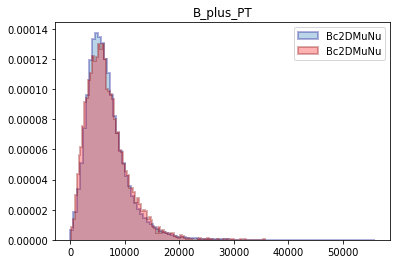

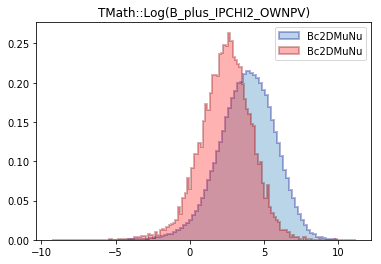

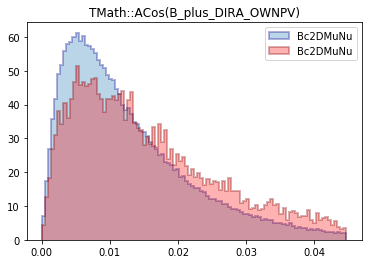

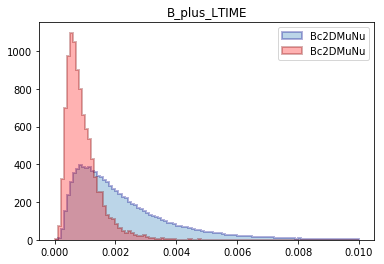

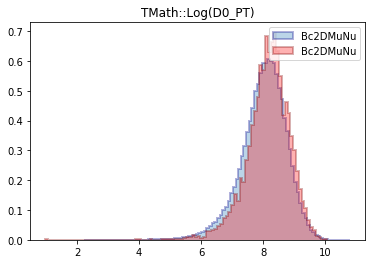

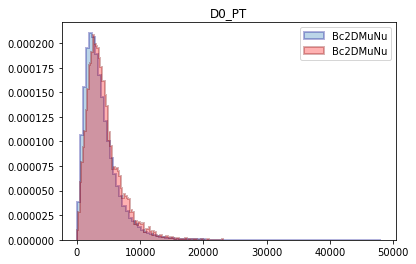

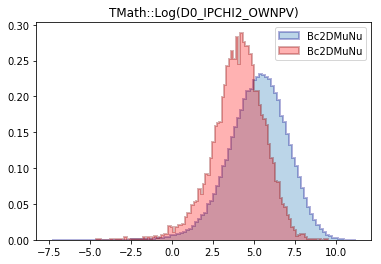

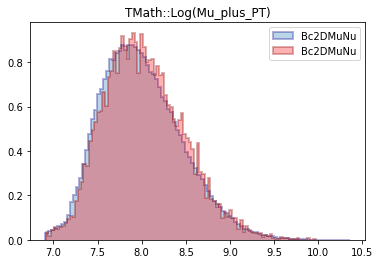

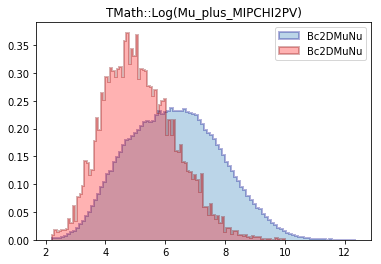

In [5]:
for branch in branches:
    BcMC = df[(df['y']==1)]['%s'%branch]
    BuMC = df[(df['y']==0)]['%s'%branch]
    if branch=='B_plus_LTIME':
        canvas = plt.figure()
        plt.title('%s'%branch)
        ax = canvas.add_subplot(111)
        _ = ax.hist(BuMC.values,  normed=True, bins=100, alpha=.3, label='Bc2DMuNu', fill=True, stacked=True,
                    histtype='step', edgecolor='darkblue', linewidth=2, range=(0.,0.01) )
        _ = ax.hist(BcMC.values, color='red',  normed=True, bins=100, alpha=.3, label='Bc2DMuNu', fill=True, stacked=True,
                    histtype='step', edgecolor='maroon', linewidth=2, range=(0.,0.01))
        _ = ax.legend(loc='best')
    
    else:
        canvas = plt.figure()
        plt.title('%s'%branch)
        ax = canvas.add_subplot(111)
        _ = ax.hist(BuMC.values,  normed=True, bins=100, alpha=.3, label='Bc2DMuNu', fill=True, stacked=True, histtype='step', 
                    edgecolor='darkblue', linewidth=2) 
        _ = ax.hist(BcMC.values, color='red',  normed=True, bins=100, alpha=.3, label='Bc2DMuNu', fill=True, stacked=True, histtype='step', 
                    edgecolor='maroon', linewidth=2)
        _ = ax.legend(loc='best')
 
#To Do:
#   - finish function (future wrapper) to plot selected branches with LaTex axes/title (with units) and **kwd, *args 
#     for range etc
#   - setup class and inheritance to use this plotter from executable/module or alike

#def Plotter(branch, sig, bkg, normed=True, bins=100, alpha=.3, fill=True, stacked=True,
#            histtype='step', linewidth=2, **kwds):
#    
#    canvas = plt.figure()
#    plt.title('%s'%branch)
#    ax = canvas.add_subplot(111)
#    _ = ax.hist(bkg.values,  normed=normed, bins=bins, alpha=alpha, label='MC Bu2DMuNu', fill=fill, stacked=stacked,
#                histtype=histtype, edgecolor='darkblue', linewidth=linewidth, **kwds )
#    _ = ax.hist(sig.values, color='red',  normed=normed, bins=bins, alpha=alpha, label='Bc2DMuNu', fill=fill,
#                    stacked=stacked, histtype=histtype, edgecolor='maroon', linewidth=linewidth, **kwds)
#    _ = ax.legend(loc='best')
#    
#    if 'range' in kwds:
#            kwds[range] = (0., 0.01)
            
#Plotter('B_plus_LTIME', df[(df['y']==1)]['B_plus_LTIME'], df[(df['y']==0)]['B_plus_LTIME'], range )
    

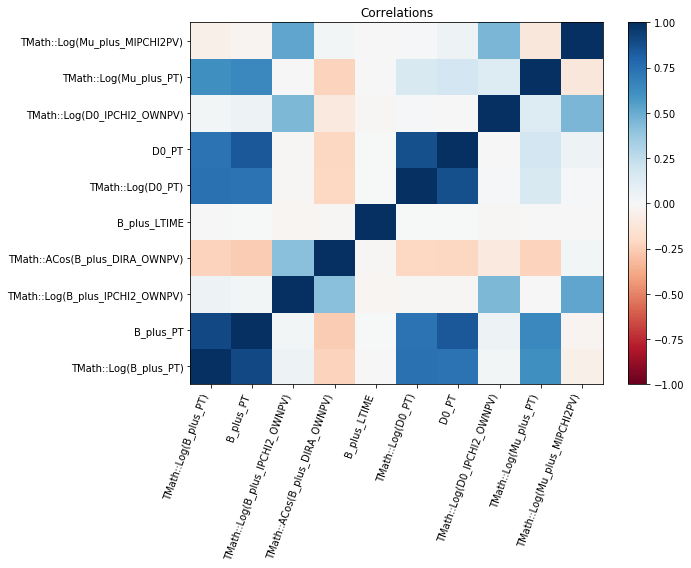

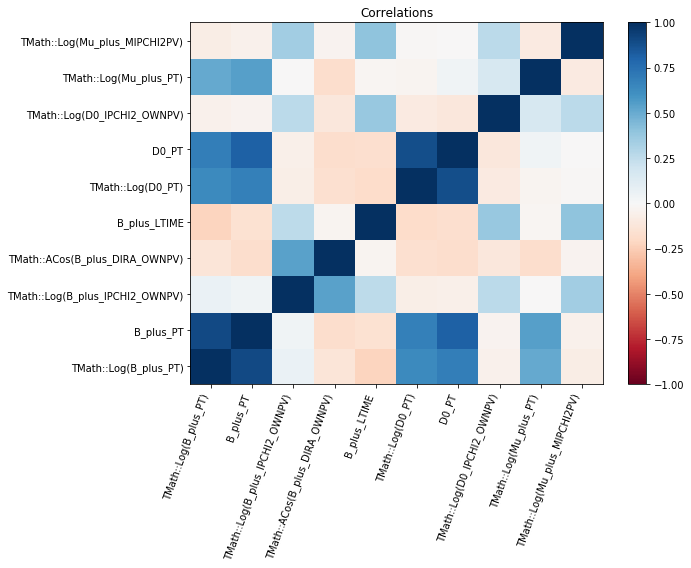

In [6]:
#To Do:
#   - finish function (future wrapper) to plot selected branches with LaTex axes/title (with units) and **kwd, *args 
#     for range etc
#   - setup class and inheritance to use this plotter from executable/module or alike

bg = df.y == 0
sig = df.y == 1

def correlations(data, **kwds):
    """Calculate pairwise correlation between features.
    
    Extra arguments are passed on to DataFrame.corr()
    """
    # simply call df.corr() to get a table of
    # correlation values if you do not need
    # the fancy plotting
    corrmat = data.corr(**kwds)

    fig, ax1 = plt.subplots(ncols=1, figsize=(10,8))
    
    opts = {'cmap': plt.get_cmap("RdBu"),
            'vmin': -1, 'vmax': +1}
    heatmap1 = ax1.pcolor(corrmat, **opts)
    plt.colorbar(heatmap1, ax=ax1)

    ax1.set_title("Correlations")

    labels = corrmat.columns.values
    for ax in (ax1,):
        # shift location of ticks to center of the bins
        ax.set_xticks(np.arange(len(labels))+0.5, minor=False)
        ax.set_yticks(np.arange(len(labels))+0.5, minor=False)
        ax.set_xticklabels(labels, minor=False, ha='right', rotation=70)
        ax.set_yticklabels(labels, minor=False)
        
    plt.tight_layout()
    
# remove the y column from the correlation matrix
# after using it to select background and signal
correlations(df[bg].drop('y', 1))
correlations(df[sig].drop('y', 1))

In [ ]:
#split into dev and eval sets using random seed and setting percentage of sample per set


